# univariate_correlations
- Investigating baseline correlations for individual features ($M_{stellar}$, $n_{sersic}$, inclination) with galaxy spin ($\lambda_R$)

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

import catalog
import encode_morphology
import plot_correlations

### Loading in galaxy information using catalog class object


In [3]:
basepath = '../../catalogues/'
outpath = '../../plots/random_forest/'

# initiating catalog class objects.
total = catalog.Catalog(basepath, version='mpl9', match_to_lim=True)
# matching to cw definitions and selecting centrals only.
total.match_to_cw(basepath, version='mpl9', sigma=3)

# adding T-type column
total.df = encode_morphology.add_Ttype_col(total.df)

### Slicing dataframe to only include most important columns 
- $\lambda_R$ used as labels here
- $n_{sersic}$ used as parametric measure of morphology
- stellar mass
- inclination (b/a)

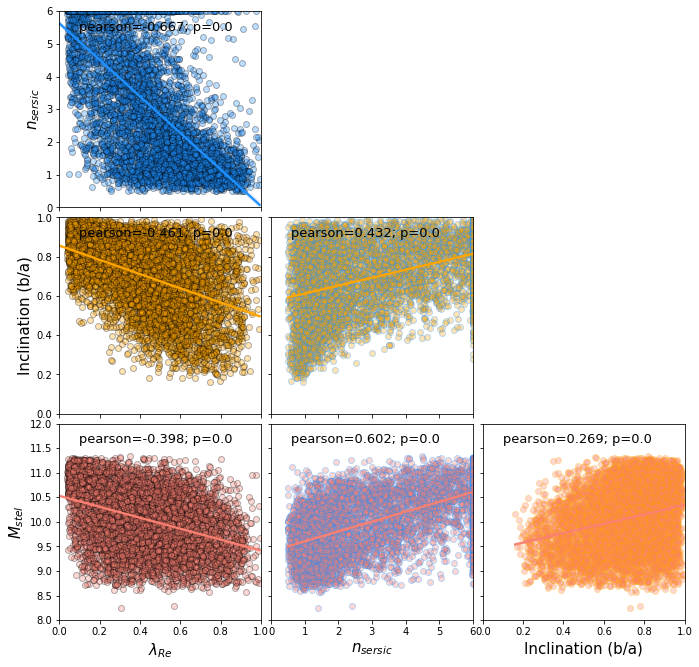

In [9]:
# defining column names
cols = ['Lambda_Re', 'nsa_sersic_n', 'nsa_elpetro_ba', 'nsa_elpetro_mass_logscale']
names = ['$\lambda_{Re}$', '$n_{sersic}$', 'Inclination (b/a)', '$M_{stel}$']
colors = ['k', 'dodgerblue', 'orange', 'salmon']
limits = [[0, 1], [0, 6], [0, 1], [8, 12]]

fig, ax = plot_correlations.correlation_corner(total.df, cols, colors, names=names, coef='pearson', limits=limits)
plt.savefig(outpath + 'key_correlation_corner.pdf', format='pdf', bbox_inches='tight')